<a href="https://colab.research.google.com/github/vishal-meshram/VIITR-DWebPortal/blob/master/MOBILENET.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd 
from keras.preprocessing.image import ImageDataGenerator, load_img
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import random
import os
import tensorflow as tf
from tensorflow.keras import layers,models
from tensorflow.keras import Model
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2

Using TensorFlow backend.


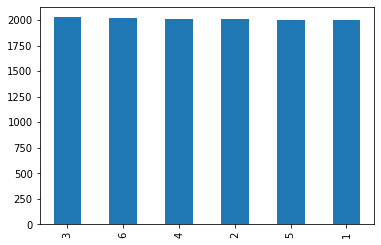

In [ ]:
filenameAll = os.listdir("/content/drive/My Drive/4 DataSet of 256x256 Size_1000 Images/allPhotos")
categoryAll = []
for filename in filenameAll:
  if("Apple" in filename):
    categoryAll.append("1")
  if("Banana" in filename):
    categoryAll.append("2")
  if("Guava" in filename):
    categoryAll.append("3")
  if("Lime" in filename):
    categoryAll.append("4")
  if("Orange" in filename):
    categoryAll.append("5")
  if("Pomegranate" in filename):
    categoryAll.append("6")

classifyOnlyFruitdf = pd.DataFrame({
    'filename': filenameAll,
    'category': categoryAll
})

classifyOnlyFruitdf = classifyOnlyFruitdf.sort_values(by ='category', ascending = 1)
classifyOnlyFruitdf
classifyOnlyFruitdf['category'].value_counts().plot.bar()

In [ ]:
train_df, test_df = train_test_split(classifyOnlyFruitdf, test_size=0.20, random_state=42)
train_df = train_df.reset_index(drop=True)
test_df = test_df.reset_index(drop=True)

In [ ]:
total_train = train_df.shape[0]
total_validate = test_df.shape[0]
batch_size=30

In [ ]:
train_datagen = ImageDataGenerator(
    rotation_range=15,
    rescale=1./255,
    shear_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1
)

train_generator = train_datagen.flow_from_dataframe(
    train_df, 
    "/content/drive/My Drive/4 DataSet of 256x256 Size_1000 Images/allPhotos", 
    x_col="filename",
    y_col="category",
    target_size=(224, 224),
    class_mode="categorical",
    batch_size=batch_size
)

test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_dataframe(
    test_df, 
    "/content/drive/My Drive/4 DataSet of 256x256 Size_1000 Images/allPhotos", 
    x_col='filename',
    y_col='category',
    target_size=(224, 224),
    class_mode='categorical',
    batch_size=batch_size,
    shuffle=False
)         

Found 9652 validated image filenames belonging to 6 classes.
Found 2414 validated image filenames belonging to 6 classes.


In [ ]:
pretrainedModel = MobileNetV2(input_shape=(224,224,3), weights="imagenet", include_top= False)
for layer in pretrainedModel.layers:
  layer.trainable = False
last_output = pretrainedModel.output
# print(last_output)
# x = layers.BatchNormalization()(last_output)
x = layers.GlobalAveragePooling2D()(last_output)
x = layers.Dense(1024, activation='relu')(x)

x = layers.Dense(6, activation='softmax')(x)

model = Model(pretrainedModel.input, x)

model.compile(loss = 'categorical_crossentropy',
              optimizer ='adam',
              metrics=['accuracy'])

model.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
Conv1_pad (ZeroPadding2D)       (None, 225, 225, 3)  0           input_3[0][0]                    
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         Conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
____________________________________________________________________________________________

In [ ]:
history = model.fit_generator(
    train_generator, 
    epochs=10,
    validation_data=test_generator,
    validation_steps=total_validate/batch_size,
    steps_per_epoch=total_train/batch_size,
)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/10
322/321 [==============================] - 4406s 14s/step - loss: 0.1107 - accuracy: 0.9619 - val_loss: 0.0269 - val_accuracy: 0.9884
Epoch 2/10
322/321 [==============================] - 153s 474ms/step - loss: 0.0467 - accuracy: 0.9853 - val_loss: 0.0206 - val_accuracy: 0.9934
Epoch 3/10
322/321 [==============================] - 153s 477ms/step - loss: 0.0247 - accuracy: 0.9907 - val_loss: 0.0163 - val_accuracy: 0.9934
Epoch 4/10
322/321 [==============================] - 153s 477ms/step - loss: 0.0337 - accuracy: 0.9886 - val_loss: 0.0078 - val_accuracy: 0.9979
Epoch 5/10
322/321 [==============================] - 154s 478ms/step - loss: 0.0238 - accuracy: 0.9912 - val_loss: 0.0114 - val_accuracy: 0.9963
Epoch 6/10
322/321 [==============================] - 153s 475ms/step - loss: 0.0168 - accuracy: 0.9950 - val_loss: 0.0073 - val_accuracy: 0.9979
Epoch 7/10
322/321 [=============================

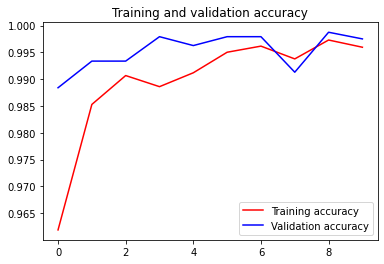

<Figure size 432x288 with 0 Axes>

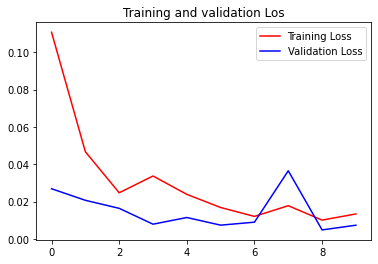

<Figure size 432x288 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']            
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()

epochs = range(len(loss))

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation Los')
plt.legend(loc=0)
plt.figure()


plt.show()

In [ ]:
from keras.preprocessing import image
from keras.applications.mobilenet_v2 import preprocess_input, decode_predictions
import numpy as np

classes = ['Apple','Banana', 'Guava', 'Lime', 'Orange', 'Pomegranate']

img_path = '/content/images/lime.jpg'
img = image.load_img(img_path, target_size=(224, 224, 3))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

preds = model.predict([x])
print(classes[np.argmax(preds)])
print(preds)

Orange
[[3.1815519e-04 2.5143446e-11 3.5889702e-09 1.1607272e-13 9.9968123e-01
  6.2135149e-07]]


In [ ]:
for i, layer in enumerate(pretrainedModel.layers):
   print(i, layer.name)

for layer in model.layers[:75]:
   layer.trainable = False

for layer in model.layers[75:]:
   layer.trainable = True
                                                        
from tensorflow.keras import optimizers
sgd = optimizers.SGD(lr=0.0001, momentum=0.9)

model.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()


0 input_3
1 Conv1_pad
2 Conv1
3 bn_Conv1
4 Conv1_relu
5 expanded_conv_depthwise
6 expanded_conv_depthwise_BN
7 expanded_conv_depthwise_relu
8 expanded_conv_project
9 expanded_conv_project_BN
10 block_1_expand
11 block_1_expand_BN
12 block_1_expand_relu
13 block_1_pad
14 block_1_depthwise
15 block_1_depthwise_BN
16 block_1_depthwise_relu
17 block_1_project
18 block_1_project_BN
19 block_2_expand
20 block_2_expand_BN
21 block_2_expand_relu
22 block_2_depthwise
23 block_2_depthwise_BN
24 block_2_depthwise_relu
25 block_2_project
26 block_2_project_BN
27 block_2_add
28 block_3_expand
29 block_3_expand_BN
30 block_3_expand_relu
31 block_3_pad
32 block_3_depthwise
33 block_3_depthwise_BN
34 block_3_depthwise_relu
35 block_3_project
36 block_3_project_BN
37 block_4_expand
38 block_4_expand_BN
39 block_4_expand_relu
40 block_4_depthwise
41 block_4_depthwise_BN
42 block_4_depthwise_relu
43 block_4_project
44 block_4_project_BN
45 block_4_add
46 block_5_expand
47 block_5_expand_BN
48 block_5_exp

In [ ]:
history = model.fit_generator(train_generator,
                              validation_data=test_generator,
                              steps_per_epoch=total_train/batch_size,
                              epochs=10,
                              validation_steps=total_validate/batch_size,
                              verbose=1)

Epoch 1/10
322/321 [==============================] - 160s 498ms/step - loss: 0.2445 - accuracy: 0.9541 - val_loss: 0.0244 - val_accuracy: 0.9938
Epoch 2/10
322/321 [==============================] - 153s 475ms/step - loss: 0.0302 - accuracy: 0.9887 - val_loss: 0.0075 - val_accuracy: 0.9975
Epoch 3/10
322/321 [==============================] - 152s 472ms/step - loss: 0.0197 - accuracy: 0.9926 - val_loss: 0.0061 - val_accuracy: 0.9979
Epoch 4/10
322/321 [==============================] - 152s 471ms/step - loss: 0.0173 - accuracy: 0.9932 - val_loss: 0.0042 - val_accuracy: 0.9992
Epoch 5/10
322/321 [==============================] - 151s 470ms/step - loss: 0.0124 - accuracy: 0.9965 - val_loss: 0.0053 - val_accuracy: 0.9979
Epoch 6/10
322/321 [==============================] - 151s 469ms/step - loss: 0.0087 - accuracy: 0.9967 - val_loss: 0.0054 - val_accuracy: 0.9983
Epoch 7/10
322/321 [==============================] - 151s 470ms/step - loss: 0.0093 - accuracy: 0.9967 - val_loss: 0.0052 -

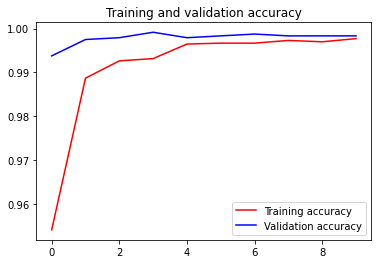

<Figure size 432x288 with 0 Axes>

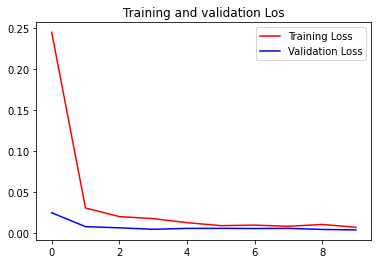

<Figure size 432x288 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']            
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()

epochs = range(len(loss))

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation Los')
plt.legend(loc=0)
plt.figure()


plt.show()

In [ ]:
from keras.preprocessing import image
from keras.applications.mobilenet_v2 import preprocess_input, decode_predictions
import numpy as np

classes = ['Apple','Banana', 'Guava', 'Lime', 'Orange', 'Pomegranate']

img_path = '/content/images/banana.jpg'
img = image.load_img(img_path, target_size=(224, 224, 3))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

preds = model.predict([x])
print(classes[np.argmax(preds)])
print(preds)

Banana
[[4.5885495e-04 9.9954116e-01 3.9311207e-10 3.6652833e-14 3.3552902e-10
  2.5636031e-13]]


In [ ]:
model.save("FruitClassifyMobileNet.h5")

In [ ]:
filenames = os.listdir("/content/drive/My Drive/4 DataSet of 256x256 Size_1000 Images/allPhotos")
categoryGoodBad = []
for filename in filenames:
  if("Good" in filename):
    categoryGoodBad.append("1")
  if("Bad" in filename):
    categoryGoodBad.append("2")
  

classifyGoodBadFruitdf = pd.DataFrame({
    'filename': filenames,            
    'category': categoryGoodBad
})
 
classifyGoodBadFruitdf = classifyGoodBadFruitdf.sort_values(by ='category', ascending = 1)

In [ ]:
classifyGoodBadFruitdf

,filename,category
0,Pomegranate_Good114.jpeg,1
6357,Guava_Good456.jpeg,1
6356,Guava_Good455.jpeg,1
6355,Guava_Good454.jpeg,1
6354,Guava_Good453.jpeg,1
...,...,...
7301,Guava_Bad427.jpeg,2
7300,Guava_Bad419.jpeg,2
7299,Guava_Bad418.jpeg,2
7310,Guava_Bad428.jpeg,2


In [ ]:
train_df, test_df = train_test_split(classifyGoodBadFruitdf, test_size=0.20, random_state=42)
train_df = train_df.reset_index(drop=True)
test_df = test_df.reset_index(drop=True)

In [ ]:
train_datagen = ImageDataGenerator(
    rotation_range=15,
    rescale=1./255,
    shear_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1
)

train_generator = train_datagen.flow_from_dataframe(
    train_df, 
    "/content/drive/My Drive/4 DataSet of 256x256 Size_1000 Images/allPhotos", 
    x_col="filename",
    y_col="category",
    target_size=(224, 224),
    class_mode="categorical",
    batch_size=batch_size
)

test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_dataframe(
    test_df, 
    "/content/drive/My Drive/4 DataSet of 256x256 Size_1000 Images/allPhotos", 
    x_col='filename',
    y_col='category',
    target_size=(224, 224),
    class_mode='categorical',
    batch_size=batch_size,
    shuffle=False
)         

Found 9652 validated image filenames belonging to 2 classes.
Found 2414 validated image filenames belonging to 2 classes.


In [ ]:
pretrainedModel = MobileNetV2(input_shape=(224,224,3), weights="imagenet", include_top=False)
for layer in pretrainedModel.layers:
  layer.trainable = False
last_output = pretrainedModel.output
# print(last_output)
x = layers.GlobalAveragePooling2D()(last_output)
x = layers.Dense(1024, activation='relu')(x)

x = layers.Dense(2, activation='softmax')(x)

modelGB = Model(pretrainedModel.input, x)

modelGB.compile(loss = 'categorical_crossentropy',
              optimizer ='adam',
              metrics=['accuracy'])

In [ ]:
history = modelGB.fit_generator(train_generator,
                              validation_data=test_generator,
                              steps_per_epoch=total_train/batch_size,
                              epochs=10,
                              validation_steps=total_validate/batch_size,
                              verbose=1)

Epoch 1/10
322/321 [==============================] - 157s 486ms/step - loss: 0.0612 - accuracy: 0.9798 - val_loss: 0.0170 - val_accuracy: 0.9942
Epoch 2/10
322/321 [==============================] - 153s 476ms/step - loss: 0.0207 - accuracy: 0.9930 - val_loss: 0.0183 - val_accuracy: 0.9938
Epoch 3/10
322/321 [==============================] - 154s 478ms/step - loss: 0.0160 - accuracy: 0.9940 - val_loss: 0.0497 - val_accuracy: 0.9822
Epoch 4/10
322/321 [==============================] - 153s 475ms/step - loss: 0.0156 - accuracy: 0.9947 - val_loss: 0.0124 - val_accuracy: 0.9959
Epoch 5/10
322/321 [==============================] - 153s 474ms/step - loss: 0.0108 - accuracy: 0.9961 - val_loss: 0.0131 - val_accuracy: 0.9950
Epoch 6/10
322/321 [==============================] - 153s 475ms/step - loss: 0.0087 - accuracy: 0.9976 - val_loss: 0.0096 - val_accuracy: 0.9979
Epoch 7/10
322/321 [==============================] - 149s 463ms/step - loss: 0.0103 - accuracy: 0.9959 - val_loss: 0.0346 -

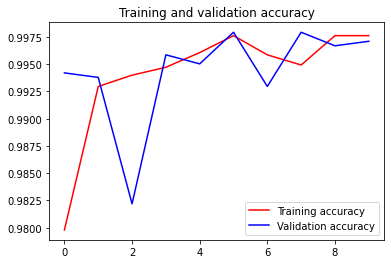

<Figure size 432x288 with 0 Axes>

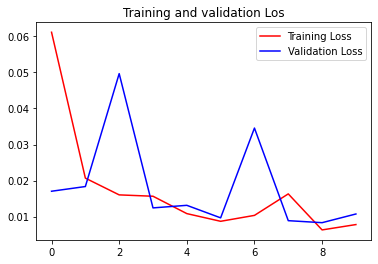

<Figure size 432x288 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.show()

epochs = range(len(loss))

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation Los')
plt.legend(loc=0)
plt.figure()

plt.show()

Populating the interactive namespace from numpy and matplotlib


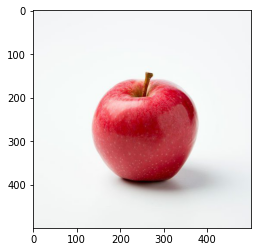

Fruit Prediction Array: 
[[9.9999547e-01 1.2406906e-09 5.2438914e-11 1.5339036e-11 9.8747485e-08
  4.4246040e-06]]
Good Bad Prediction Array: 
[[9.9999893e-01 1.0623461e-06]]
Fruit Prediction Class : Apple
Good Bad Prediction Class : Good


In [ ]:
from keras.preprocessing import image
from keras.applications.inception_v3 import preprocess_input, decode_predictions
import numpy as np

classes = ['Good', 'Bad']
fruitClasses = ['Apple','Banana', 'Guava', 'Lime', 'Orange', 'Pomegranate']
img_path = '/content/images/organic-apple-fruit-500x500.jpg'
img = image.load_img(img_path, target_size=(299, 299, 3))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

fruitPreds = model.predict([x])
goodBadPreds = modelGB.predict([x])

%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img=mpimg.imread(img_path)
imgplot = plt.imshow(img)
plt.show()

print("Fruit Prediction Array: ")
print(fruitPreds)
print("Good Bad Prediction Array: ")
print(goodBadPreds)
print("Fruit Prediction Class : " + fruitClasses[np.argmax(fruitPreds)])
print("Good Bad Prediction Class : " + classes[np.argmax(goodBadPreds)])

In [ ]:
modelGB.save("FruitGoodBadClassifyMOBILENET.h5")